<a href="https://colab.research.google.com/github/iam-pattan/DL-lab/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

## Code-1

https://analyticsindiamag.com/transfer-learning-for-multi-class-image-classification-using-deep-convolutional-neural-network/

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam

from keras.callbacks import ReduceLROnPlateau

In [ ]:
from keras.datasets import cifar10

#Downloading the CIFAR dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
#defining training and test sets
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((35000, 32, 32, 3),
 (35000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 (15000, 32, 32, 3),
 (15000, 1))

In [ ]:
#One Hot Encoding
from keras.utils import to_categorical

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)

In [ ]:
#Defining the VGG Convolutional Neural Net
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = y_train.shape[1])

80142336/80134624 [==============================] - 2s 0us/step


In [ ]:
model= Sequential()
model.add(base_model) 
model.add(Flatten())

In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.3))

#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
#Initializing the hyperparameters
batch_size= 100
epochs=5
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
model.fit_generator(train_generator.flow(x_train, y_train, batch_size= batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps=250, callbacks=[lrr], verbose = 1)

In [ ]:
#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

In [ ]:
#Making prediction
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

## Code-2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
import tensorflow_datasets as tfds
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam

In [ ]:
!wget 'https://github.com/krishnaik06/Deep-Learning-Car-Brand/raw/master/Datasets.zip'

--2021-03-24 08:32:00--  https://github.com/krishnaik06/Deep-Learning-Car-Brand/raw/master/Datasets.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krishnaik06/Deep-Learning-Car-Brand/master/Datasets.zip [following]
--2021-03-24 08:32:00--  https://raw.githubusercontent.com/krishnaik06/Deep-Learning-Car-Brand/master/Datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1106994 (1.1M) [application/zip]
Saving to: ‘Datasets.zip’

Datasets.zip        100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2021-03-24 08:32:00 (22.1 MB/s) - ‘Datasets.zip’ saved [1106994/1106994]



In [ ]:
!unzip /content/Datasets.zip

In [ ]:
#defining training and test sets
train_pth = '/content/Datasets/Train/'
test_pth = '/content/Datasets/Test/'

In [ ]:
from glob import glob
train = glob(train_pth+'/*')
len(train)

3

In [ ]:
train_gen = ImageDataGenerator( rescale=1./255).flow_from_directory(train_pth, target_size=(224,224), classes=['lamborghini', 'audi', 'mercedes'])
test_gen = ImageDataGenerator( rescale=1./255).flow_from_directory(test_pth, target_size=(224,224), classes=['lamborghini', 'audi', 'mercedes'])

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [ ]:
from keras.applications import MobileNet

mobnet = MobileNet()
vgg = VGG19(weights='imagenet', include_top=False)

In [ ]:
for layer in mobnet.layers:
    layer.trainable = False

for layer in vgg.layers:
    layer.trainable = False  

In [ ]:
model = Sequential()
for layers in mobnet.layers:
  model.add(layers)

model.add(Flatten())
model.add(Dense(len(train), activation='softmax'))
# model.summary()


fc = Flatten()(vgg.output)
final_layer = Dense(len(train), activation='softmax')(fc)
model_vgg = Model(vgg.input, final_layer)
model_vgg.summary()

In [ ]:
import keras.optimizers as opt 
dir(opt)
optim = opt.Adam()

In [ ]:
optim1 = opt.Nadam()

In [ ]:
optim2 = tfa.optimizers.AdamW(0.01)

In [ ]:
# !pip install keras-adabound
from keras_adabound import AdaBound

optim3=AdaBound(lr=1e-3, final_lr=0.1)

In [ ]:
model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_vgg.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
  history = model.fit_generator(train_gen, epochs=50, validation_data = test_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 2s 701ms/step - loss: 1.0843 - accuracy: 0.5417 - val_loss: 1.0841 - val_accuracy: 0.6379
Epoch 2/50
2/2 [==============================] - 0s 217ms/step - loss: 1.0851 - accuracy: 0.5000 - val_loss: 1.0836 - val_accuracy: 0.6379
Epoch 3/50
2/2 [==============================] - 0s 219ms/step - loss: 1.0843 - accuracy: 0.5104 - val_loss: 1.0830 - val_accuracy: 0.6379
Epoch 4/50
2/2 [==============================] - 0s 216ms/step - loss: 1.0834 - accuracy: 0.5208 - val_loss: 1.0825 - val_accuracy: 0.6379
Epoch 5/50
2/2 [==============================] - 0s 222ms/step - loss: 1.0799 - accuracy: 0.5625 - val_loss: 1.0819 - val_accuracy: 0.6379
Epoch 6/50
2/2 [==============================] - 0s 225ms/step - loss: 1.0792 - accuracy: 0.5625 - val_loss: 1.0814 - val_accuracy: 0.6379
Epoch 7/50
2/2 [==============================] - 0s 221ms/step - loss: 1.0818 - accuracy: 0.5208 - val_loss: 1.0809 - val_accuracy: 0.6379
Epoch 8/50
2/2 [====

-> Adam is giving train `77.08` and test `67.24` 

-> AdamW is giving train `71.8` and test `62.07`

-> Nadam is giving train `67.7` and test `63.79`

-> Adabound is giving train `63.5` and test `67.24`

-> SGD is giving train `61.46` and test `62.07`

In [ ]:
history_vgg = model_vgg.fit_generator(train_gen, epochs=50, validation_data = test_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 3s 754ms/step - loss: 1.0989 - accuracy: 0.2917 - val_loss: 1.1156 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 490ms/step - loss: 1.0960 - accuracy: 0.3125 - val_loss: 1.1155 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 483ms/step - loss: 1.0963 - accuracy: 0.3125 - val_loss: 1.1153 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 485ms/step - loss: 1.0968 - accuracy: 0.3229 - val_loss: 1.1151 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 485ms/step - loss: 1.0966 - accuracy: 0.3854 - val_loss: 1.1149 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 482ms/step - loss: 1.0927 - accuracy: 0.4062 - val_loss: 1.1149 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 494ms/step - loss: 1.0942 - accuracy: 0.3958 - val_loss: 1.1147 - val_accuracy: 0.3276
Epoch 8/50
2/2 [====

KeyboardInterrupt: ignored

tensorflow addons to try different losses, optimizers,,............................just trying stuff 

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 706kB 15.5MB/s 


In [ ]:
losses = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
train,test = tf.keras.datasets.mnist.load_data()
x_train, y_train = train
x_train = x_train[..., tf.newaxis] / 255.0

# TFA layers and activations
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3),
                         activation=tfa.activations.gelu),
  tfa.layers.GroupNormalization(groups=5, axis=3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

# TFA optimizers, losses and metrics
model.compile(
    optimizer=tfa.optimizers.AdamW(0.01),
    loss=tfa.losses.TripletSemiHardLoss(),
    metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/gelu.py:81: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


1875/1875 [==============================] - 7s 3ms/step - loss: 0.8846 - accuracy: 0.0955
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8883 - accuracy: 0.0953
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8727 - accuracy: 0.0873
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7422 - accuracy: 0.0117
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0000 - accuracy: 0.0769
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0000 - accuracy: 0.1012
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0000 - accuracy: 0.1012
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0000 - accuracy: 0.1002
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0000 - accuracy: 0.1009
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0000 - accurac

## CODE-3
#####Trying on own

In [ ]:
!wget 'https://github.com/OlafenwaMoses/IdenProf/releases/download/v1.0/idenprof-jpg.zip'
!unzip '/content/idenprof-jpg.zip'

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# !cp -r '/content/drive/MyDrive/Colab Notebooks/idenprof' '/content/'

In [ ]:
path = '/content/idenprof'

In [ ]:
# useful for getting number of output classes
folders = glob(path + '/train/*')

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = path + '/train'
valid_path = path + '/test'

In [ ]:
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights(freeze layers)
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
# last layer for vgg model with classes to predict
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
### Optional step(as my data is good in lenght so not required)
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
                                  #  shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 9000 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2000 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
282/282 [==============================] - 53s 185ms/step - loss: 1.5409 - accuracy: 0.5182 - val_loss: 1.0635 - val_accuracy: 0.6805
Epoch 2/10
282/282 [==============================] - 45s 161ms/step - loss: 0.3993 - accuracy: 0.8674 - val_loss: 0.8487 - val_accuracy: 0.7365
Epoch 3/10
282/282 [==============================] - 46s 164ms/step - loss: 0.1777 - accuracy: 0.9537 - val_loss: 0.9493 - val_accuracy: 0.7285
Epoch 4/10
282/282 [==============================] - 46s 162ms/step - loss: 0.0927 - accuracy: 0.9849 - val_loss: 0.9258 - val_accuracy: 0.7355
Epoch 5/10
282/282 [==============================] - 46s 163ms/step - loss: 0.0455 - accuracy: 0.9972 - val_loss: 0.8686 - val_accuracy: 0.7545
Epoch 6/10
282/282 [==============================] - 46s 163ms/step - loss: 0.0315 - accuracy: 0.9981 - val_loss: 0.8606 - val_accuracy: 0.7610
Epoch 7/10
282/282 [==============================] - 46s 162ms/step - loss: 0.0268 - accuracy: 0.9981 - val_loss: 0.8848 - val_ac

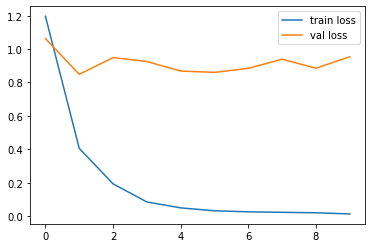

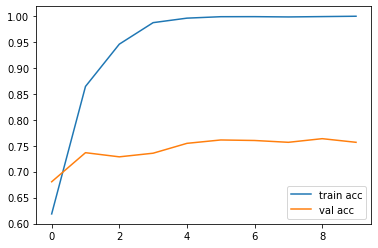

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Validating how model is working 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model.save('model_vgg.h5')

In [ ]:
!cp '/content/model_vgg.h5' '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
model=load_model('model_vgg.h5')

In [ ]:
img=image.load_img(path + '/test/police/police-103.jpg', target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
X=img
x=x/255
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
a

array([4])